In [827]:
import numpy as np
from matplotlib import pyplot as plt
import numpy.lib.recfunctions as nlr
%matplotlib inline

In [828]:
Data = np.genfromtxt('recs2009_public.csv',delimiter=',',\
                     dtype=[('WALLTYPE', '<i8'),('HDD65', '<i8'),('DIPSTICK','i8'),('FUELHEAT','i8'),('WINDOWS','i8'),\
                     ('PELHEAT','i8'),('PGASHEAT','i8'),('TOTHSQFT','<i8'),('TOTALBTUSPH','<f8')],\
                     skip_header=1,usecols=(24,6,315,430,609,699,705,829,908))

In [829]:
Data.dtype.fields

mappingproxy({'PELHEAT': (dtype('int64'), 40), 'HDD65': (dtype('int64'), 8), 'DIPSTICK': (dtype('int64'), 16), 'FUELHEAT': (dtype('int64'), 24), 'WALLTYPE': (dtype('int64'), 0), 'TOTHSQFT': (dtype('int64'), 56), 'PGASHEAT': (dtype('int64'), 48), 'WINDOWS': (dtype('int64'), 32), 'TOTALBTUSPH': (dtype('float64'), 64)})

In [830]:
Data.shape

(12083,)

In [831]:
area = np.where(Data['TOTHSQFT']>0)
Data = Data[area]
wall = np.where(Data['WALLTYPE']<8)
Data = Data[wall]
#dipstick = np.where(Data['DIPSTICK']==0)
#Data = Data[dipstick]
fuel = np.where(Data['FUELHEAT']!=-2)
Data = Data[fuel]
#elepay = np.where(Data['PELHEAT']!=-2)
#Data = Data[elepay]
#gaspay = np.where(Data['PGASHEAT']!=-2)
#Data = Data[gaspay]
energy = Data['TOTALBTUSPH']/Data['TOTHSQFT']
Data_1 = nlr.drop_fields(Data,('TOTHSQFT','TOTALBTUSPH'))
Data_2 = nlr.append_fields(Data_1,'energy',data=energy)

In [832]:
Data_2.shape

(11588,)

In [833]:
Data_2

masked_array(data = [(1, 4742, -2, 5, 41, 1, -2, 2.7470944921677614)
 (2, 2662, -2, 1, 41, -2, 1, 14.110380116959064)
 (1, 6233, -2, 1, 20, -2, 2, 76.22727272727273) ...,
 (3, 7935, 0, 1, 42, -2, 1, 16.892131069122218)
 (1, 5834, 0, 1, 41, -2, 1, 57.66319444444444)
 (2, 2806, -2, 1, 30, 1, 1, 4.81504424778761)],
             mask = [(False, False, False, False, False, False, False, False)
 (False, False, False, False, False, False, False, False)
 (False, False, False, False, False, False, False, False) ...,
 (False, False, False, False, False, False, False, False)
 (False, False, False, False, False, False, False, False)
 (False, False, False, False, False, False, False, False)],
       fill_value = (999999, 999999, 999999, 999999, 999999, 999999, 999999, 1e+20),
            dtype = [('WALLTYPE', '<i8'), ('HDD65', '<i8'), ('DIPSTICK', '<i8'), ('FUELHEAT', '<i8'), ('WINDOWS', '<i8'), ('PELHEAT', '<i8'), ('PGASHEAT', '<i8'), ('energy', '<f8')])

In [834]:
N = len(Data_2)
DM_material = np.zeros((N,7))
for i in range(N):
    DM_material[i][Data_2['WALLTYPE'][i]-1] = 1
DM_material

array([[ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.]])

In [835]:
DM_fuel = np.zeros((N,9))
for i in range(N):
    if Data_2['FUELHEAT'][i] == 21:
        DM_fuel[i][8] = 1
    elif Data_2['FUELHEAT'][i] == 8 or Data_2['FUELHEAT'][i] == 7 or Data_2['FUELHEAT'][i] == 9:
        DM_fuel[i][Data_2['FUELHEAT'][i]-2] = 1
    else:
        DM_fuel[i][Data_2['FUELHEAT'][i]-1] = 1
DM_fuel

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.]])

In [836]:
DM_gaspay = np.zeros((N,4))
for i in range(N):
    if Data_2['PGASHEAT'][i] == -2:
        DM_gaspay[i][3] = 1
    else:
        DM_gaspay[i][Data_2['PGASHEAT'][i]-1] = 1
DM_gaspay

array([[ 0.,  0.,  0.,  1.],
       [ 1.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       ..., 
       [ 1.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.]])

In [837]:
DM_elepay = np.zeros((N,4))
for i in range(N):
    if Data_2['PELHEAT'][i] == -2:
        DM_elepay[i][3] = 1
    else:
        DM_elepay[i][Data_2['PELHEAT'][i]-1] = 1
DM_elepay

array([[ 1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  1.],
       ..., 
       [ 0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  1.],
       [ 1.,  0.,  0.,  0.]])

In [838]:
DM_dipstick = np.zeros((N,3))
for i in range(N):
    if Data_2['DIPSTICK'][i] == -2:
        DM_dipstick[i][2] = 1
    else:
        DM_dipstick[i][Data_2['DIPSTICK'][i]] = 1
DM_dipstick

array([[ 0.,  0.,  1.],
       [ 0.,  0.,  1.],
       [ 0.,  0.,  1.],
       ..., 
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 0.,  0.,  1.]])

In [839]:
DM_windows = np.zeros((N,8))
for i in range(N):
    if Data_2['WINDOWS'][i] == 0:
        DM_windows[i][0] = 1
    elif Data_2['WINDOWS'][i] == 10:
        DM_windows[i][1] = 1
    elif Data_2['WINDOWS'][i] == 20:
        DM_windows[i][2] = 1
    elif Data_2['WINDOWS'][i] == 30:
        DM_windows[i][3] = 1
    elif Data_2['WINDOWS'][i] == 41:
        DM_windows[i][4] = 1
    elif Data_2['WINDOWS'][i] == 42:
        DM_windows[i][5] = 1
    elif Data_2['WINDOWS'][i] == 50:
        DM_windows[i][6] = 1
    else:
        DM_windows[i][7] = 1
DM_windows

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  1.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [840]:
print('The minimum heating degree days is '+str(min(Data['HDD65'])))
print('The maximum heating degree days is '+str(max(Data['HDD65'])))

The minimum heating degree days is 53
The maximum heating degree days is 12525


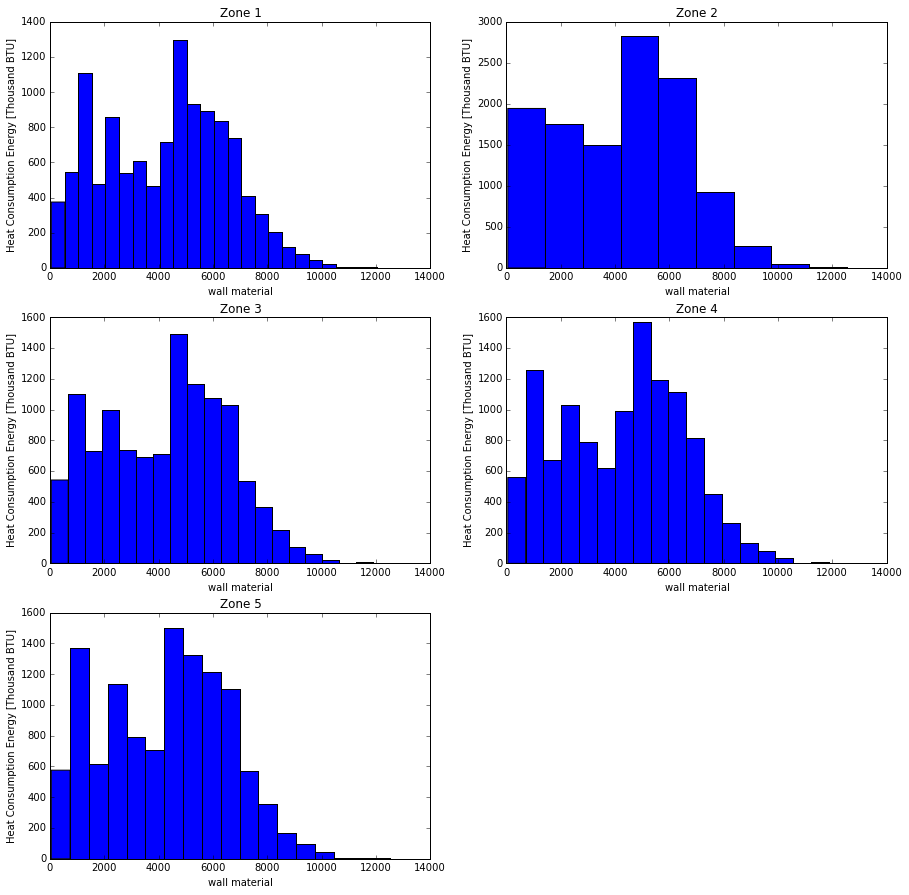

In [841]:
fig1= plt.figure(figsize=(15,15))

plt.subplot(321)
plt.hist(Data['HDD65'],bins=25)
plt.title('Zone 1')
plt.xlabel('wall material')
plt.ylabel('Heat Consumption Energy [Thousand BTU]')

plt.subplot(322)
plt.hist(Data['HDD65'],bins=9)
plt.title('Zone 2')
plt.xlabel('wall material')
plt.ylabel('Heat Consumption Energy [Thousand BTU]')

plt.subplot(323)
plt.hist(Data['HDD65'],bins=20)
plt.title('Zone 3')
plt.xlabel('wall material')
plt.ylabel('Heat Consumption Energy [Thousand BTU]')

plt.subplot(324)
plt.hist(Data['HDD65'],bins=19)
plt.title('Zone 4')
plt.xlabel('wall material')
plt.ylabel('Heat Consumption Energy [Thousand BTU]')

plt.subplot(325)
plt.hist(Data['HDD65'],bins=18)
plt.title('Zone 5')
plt.xlabel('wall material')
plt.ylabel('Heat Consumption Energy [Thousand BTU]')

In [842]:
def Tc(hdd, T_bound):
    
    Tc_matrix = np.zeros((len(hdd), len(T_bound)+1))
    
    for (i,t) in enumerate(hdd):
        # first chunk
        if t <= T_bound[0]:
            Tc_matrix[i,0] = t
            continue
        else:
            Tc_matrix[i,0] = T_bound[0]
       
        # chunks in the middle
        n = 1
        while(n < len(T_bound)-1 and t > T_bound[n]):
            Tc_matrix[i,n] = T_bound[n+1] - T_bound[n]
            n += 1
        if(n < len(T_bound) and t <= T_bound[n]):
            Tc_matrix[i,n] = t - T_bound[n-1]
            continue
        
        # last chunk
        if(t > T_bound[-1]):
            if(len(T_bound)>1):
                Tc_matrix[i,-2] = T_bound[-1] - T_bound[-2]
            Tc_matrix[i,-1] = t - T_bound[-1]
    
    return Tc_matrix

In [1280]:
# get T_bound
num_chunk = 25

H_bound = np.linspace(min(Data['HDD65']),max(Data['HDD65']),num_chunk+1)[1:-1]
H_bound

array([   551.88,   1050.76,   1549.64,   2048.52,   2547.4 ,   3046.28,
         3545.16,   4044.04,   4542.92,   5041.8 ,   5540.68,   6039.56,
         6538.44,   7037.32,   7536.2 ,   8035.08,   8533.96,   9032.84,
         9531.72,  10030.6 ,  10529.48,  11028.36,  11527.24,  12026.12])

In [1281]:
DM_hdd = Tc(Data_2['HDD65'],H_bound)
DM_hdd.shape

(11588, 25)

In [1282]:
energy = Data_2['energy']
energy.shape

(11588,)

In [1297]:
X = np.hstack((DM_material,DM_fuel,DM_hdd,DM_dipstick))
X

array([[ 1.,  0.,  0., ...,  0.,  0.,  1.],
       [ 0.,  1.,  0., ...,  0.,  0.,  1.],
       [ 1.,  0.,  0., ...,  0.,  0.,  1.],
       ..., 
       [ 0.,  0.,  1., ...,  1.,  0.,  0.],
       [ 1.,  0.,  0., ...,  1.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  1.]])

In [1284]:
#from scipy import linalg
np.linalg.inv(np.dot(X.T,X))

array([[  3.65439989e+11,   4.53178074e+11,   4.22831089e+11, ...,
         -1.71366022e+11,  -2.08942127e+11,  -2.68216544e+11],
       [  3.65439989e+11,   4.53178074e+11,   4.22831089e+11, ...,
         -1.71366022e+11,  -2.08942127e+11,  -2.68216544e+11],
       [  3.65439989e+11,   4.53178074e+11,   4.22831089e+11, ...,
         -1.71366022e+11,  -2.08942127e+11,  -2.68216544e+11],
       ..., 
       [ -4.22661012e+11,  -4.22661012e+11,  -4.22661012e+11, ...,
          1.06619309e+12,   1.06619309e+12,   1.06619309e+12],
       [ -4.22661012e+11,  -4.22661012e+11,  -4.22661012e+11, ...,
          1.06619309e+12,   1.06619309e+12,   1.06619309e+12],
       [ -4.22661012e+11,  -4.22661012e+11,  -4.22661012e+11, ...,
          1.06619309e+12,   1.06619309e+12,   1.06619309e+12]])

In [1285]:
beta_hat = (linalg.inv(np.dot(X.T,X)).dot(X.T)).dot(energy)
beta_hat

masked_array(data = [  2.24368541e+01  -2.69367116e+01   2.56770540e+01  -8.06490119e+01
  -1.91003027e+01  -1.16185326e+01  -3.81134017e+01   1.11357103e+02
   6.73552354e+01  -8.85036832e+01   3.14595129e+01  -1.69511331e+01
   1.18606210e+02  -3.56294592e+01  -1.61372408e+01  -2.39179913e+01
   2.75064133e-03  -4.76590846e-03   3.01742717e-03   3.34831433e-03
   1.93226065e-03   7.13457114e-03   3.62479953e-03   4.78596277e-03
   9.67218344e-03  -2.79343541e-03   7.07080640e-03  -5.64363362e-04
   3.25410436e-03   1.54981943e-03  -1.33057460e-02  -6.94462247e-03
   3.35816758e-03   2.35512835e-02  -2.68173339e-03   8.72310828e-04
   3.03335120e-02   2.10511301e-02  -7.12351835e-02   1.68385742e-03
   2.22912061e-02   1.93989442e+01   1.30795586e+01   8.32539835e+00],
             mask = False,
       fill_value = 1e+20)

In [1286]:
predicted = np.dot(X, beta_hat)
Y = energy
print(Y)
print(predicted)
SSres = (Y-predicted).T.dot(Y-predicted)
SSres
ave_y = np.mean(Y)
SStot = (Y-ave_y).T.dot(Y-ave_y)
R2 = 1-SSres/SStot
R2

[2.7470944921677614 14.110380116959064 76.22727272727273 ...,
 16.892131069122218 57.66319444444444 4.81504424778761]
[  29.1156319    96.84352641  160.46180423 ...,  167.13517161  171.0218867
   97.87090465]


-5.8158963042823153

In [1287]:
P = len(X[0])
MSE = SSres/(N-P)
MSE

8240.2342158329811

In [1288]:
a = linalg.inv((X.T).dot(X))
a_diagonal = a.diagonal()
a_diagonal

array([  4.79430149e+11,   3.73764896e+11,   4.13389366e+11,
         4.29899562e+11,   4.86034227e+11,   3.73764896e+11,
         3.60556739e+11,   8.50555235e+11,   7.60058536e+11,
         9.10886368e+11,   8.05306885e+11,   9.81272689e+11,
         7.44975753e+11,   8.20389669e+11,   8.45527641e+11,
         7.29892970e+11,   7.54444084e-08,   2.49842647e-08,
         2.73780685e-08,   3.09843856e-08,   3.16040381e-08,
         2.50602029e-08,   3.08083309e-08,   3.17523556e-08,
         2.57425428e-08,   1.92277620e-08,   1.83902363e-08,
         2.03491795e-08,   2.07169589e-08,   2.78091170e-08,
         4.10014460e-08,   6.18905655e-08,   1.00136177e-07,
         1.77870659e-07,   2.59695664e-07,   4.01145655e-07,
         1.30004434e-06,   3.91049611e-06,   5.09408883e-06,
         7.87349185e-06,   8.24266761e-06,   1.06619309e+12,
         1.06619309e+12,   1.06619309e+12])

In [1289]:
S_beta_k_sqaure =  MSE*a_diagonal
S_beta_k = np.sqrt(S_beta_k_sqaure)
S_beta_k

array([  6.28539316e+07,   5.54969394e+07,   5.83645886e+07,
         5.95186784e+07,   6.32853527e+07,   5.54969394e+07,
         5.45075406e+07,   8.37184230e+07,   7.91394993e+07,
         8.66366955e+07,   8.14611401e+07,   8.99217259e+07,
         7.83503330e+07,   8.22204538e+07,   8.34706283e+07,
         7.75531368e+07,   2.49335035e-02,   1.43483864e-02,
         1.50200432e-02,   1.59786919e-02,   1.61376788e-02,
         1.43701754e-02,   1.59332314e-02,   1.61755015e-02,
         1.45644973e-02,   1.25873453e-02,   1.23101525e-02,
         1.29492087e-02,   1.30657030e-02,   1.51378214e-02,
         1.83810097e-02,   2.25830192e-02,   2.87253468e-02,
         3.82844079e-02,   4.62596270e-02,   5.74937749e-02,
         1.03502028e-01,   1.79508785e-01,   2.04881637e-01,
         2.54714383e-01,   2.60617558e-01,   9.37319626e+07,
         9.37319626e+07,   9.37319626e+07])

Create a 95% confidence level.

In [1290]:
from scipy.stats import t
t_1 = t.isf(0.025,N-P)
t_1

1.9601695039223017

In [1291]:
low_CI = beta_hat-t_1*S_beta_k
high_CI = beta_hat+t_1*S_beta_k
CI = np.vstack((low_CI, high_CI)).T
CI

masked_array(data =
 [[ -1.23204338e+08   1.23204382e+08]
 [ -1.08783435e+08   1.08783381e+08]
 [ -1.14404461e+08   1.14404512e+08]
 [ -1.16666779e+08   1.16666618e+08]
 [ -1.24050038e+08   1.24049999e+08]
 [ -1.08783420e+08   1.08783397e+08]
 [ -1.06844057e+08   1.06843981e+08]
 [ -1.64102188e+08   1.64102411e+08]
 [ -1.55126766e+08   1.55126901e+08]
 [ -1.69822697e+08   1.69822520e+08]
 [ -1.59677611e+08   1.59677674e+08]
 [ -1.76261842e+08   1.76261808e+08]
 [ -1.53579815e+08   1.53580052e+08]
 [ -1.61166062e+08   1.61165990e+08]
 [ -1.63616596e+08   1.63616564e+08]
 [ -1.52017318e+08   1.52017270e+08]
 [ -4.61232518e-02   5.16245345e-02]
 [ -3.28911780e-02   2.33593610e-02]
 [ -2.64244034e-02   3.24592577e-02]
 [ -2.79726302e-02   3.46692589e-02]
 [ -2.97003251e-02   3.35648464e-02]
 [ -2.10334085e-02   3.53025508e-02]
 [ -2.76070347e-02   3.48566338e-02]
 [ -2.69207619e-02   3.64926874e-02]
 [ -1.88767001e-02   3.82210669e-02]
 [ -2.74667659e-02   2.18798950e-02]
 [ -1.70591791e-0

In [1292]:
diff = np.diff(CI)
diff

masked_array(data =
 [[  2.46408720e+08]
 [  2.17566816e+08]
 [  2.28808973e+08]
 [  2.33333397e+08]
 [  2.48100037e+08]
 [  2.17566816e+08]
 [  2.13688038e+08]
 [  3.28204599e+08]
 [  3.10253666e+08]
 [  3.39645217e+08]
 [  3.19355285e+08]
 [  3.52523650e+08]
 [  3.07159867e+08]
 [  3.22332052e+08]
 [  3.27233160e+08]
 [  3.04034587e+08]
 [  9.77477863e-02]
 [  5.62505390e-02]
 [  5.88836611e-02]
 [  6.26418891e-02]
 [  6.32651716e-02]
 [  5.63359592e-02]
 [  6.24636685e-02]
 [  6.34134493e-02]
 [  5.70977670e-02]
 [  4.93466609e-02]
 [  4.82599711e-02]
 [  5.07652878e-02]
 [  5.12219850e-02]
 [  5.93453918e-02]
 [  7.20597894e-02]
 [  8.85330910e-02]
 [  1.12613098e-01]
 [  1.50087858e-01]
 [  1.81353420e-01]
 [  2.25395089e-01]
 [  4.05763039e-01]
 [  7.03735291e-01]
 [  8.03205473e-01]
 [  9.98566732e-01]
 [  1.02170918e+00]
 [  3.67461069e+08]
 [  3.67461069e+08]
 [  3.67461069e+08]],
             mask =
 False,
       fill_value = 1e+20)

In [1293]:
np.where(diff<50)

(array([16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
        33, 34, 35, 36, 37, 38, 39, 40]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0]))

In [1294]:
T = beta_hat/S_beta_k
T

masked_array(data = [3.569681880001958e-07 -4.853729210691395e-07 4.399423462518954e-07
 -1.3550202059423983e-06 -3.018123763701536e-07 -2.0935447524818683e-07
 -6.992317270315613e-07 1.330138564305017e-06 8.510950406215326e-07
 -1.0215496180374008e-06 3.861904324136985e-07 -1.8850987219770021e-07
 1.513793316145047e-06 -4.333405815318026e-07 -1.9332837381686245e-07
 -3.084077867849809e-07 0.11031908648219983 -0.33215640566009286
 0.20089337508912283 0.2095487134160817 0.11973597155814207
 0.49648462401887317 0.22749933400119168 0.29587724275465443
 0.6640931866221754 -0.22192411025082437 0.5743882044374322
 -0.043582845653453404 0.2490569678693018 0.10238061251036644
 -0.7238854785132276 -0.30751523592140967 0.11690607600284786
 0.6151664544453885 -0.05797135777877348 0.01517226567143384
 0.29307166703731846 0.11727075153830062 -0.347689449439907
 0.0066107669118400875 0.08553224969138296 2.069618910831305e-07
 1.3954213963552686e-07 8.882133819412858e-08],
             mask = [False 

In [1295]:
alpha = 0.01
t_2 = t.isf(0.005,N-P)
t_2

2.5762552662136433

In [1296]:
for i in range(len(T)):
    if -t_2 < T[i] < t_2:
        print((i,T[i]))

(0, 3.5696818800019581e-07)
(1, -4.8537292106913945e-07)
(2, 4.3994234625189542e-07)
(3, -1.3550202059423983e-06)
(4, -3.0181237637015357e-07)
(5, -2.0935447524818683e-07)
(6, -6.9923172703156131e-07)
(7, 1.3301385643050171e-06)
(8, 8.5109504062153255e-07)
(9, -1.0215496180374008e-06)
(10, 3.8619043241369849e-07)
(11, -1.8850987219770021e-07)
(12, 1.5137933161450471e-06)
(13, -4.3334058153180263e-07)
(14, -1.9332837381686245e-07)
(15, -3.0840778678498091e-07)
(16, 0.11031908648219983)
(17, -0.33215640566009286)
(18, 0.20089337508912283)
(19, 0.20954871341608169)
(20, 0.11973597155814207)
(21, 0.49648462401887317)
(22, 0.22749933400119168)
(23, 0.29587724275465443)
(24, 0.66409318662217542)
(25, -0.22192411025082437)
(26, 0.57438820443743221)
(27, -0.043582845653453404)
(28, 0.24905696786930179)
(29, 0.10238061251036644)
(30, -0.7238854785132276)
(31, -0.30751523592140967)
(32, 0.11690607600284786)
(33, 0.61516645444538853)
(34, -0.057971357778773477)
(35, 0.01517226567143384)
(36, 0.29